In [1]:
import pandas

import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


import datetime
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
df = pandas.read_csv('./current_implementation.csv')
df['Time'] = df['Time'].apply(lambda t: pandas.Timedelta(t, 'microseconds'))
df['Time'] = df['Time'] + pandas.to_datetime('1970/01/01')
df['Usage in KBi'] = df['Usage in bytes'] / 1024
track_columns= [c for c in df.columns if c.startswith('Track:')]

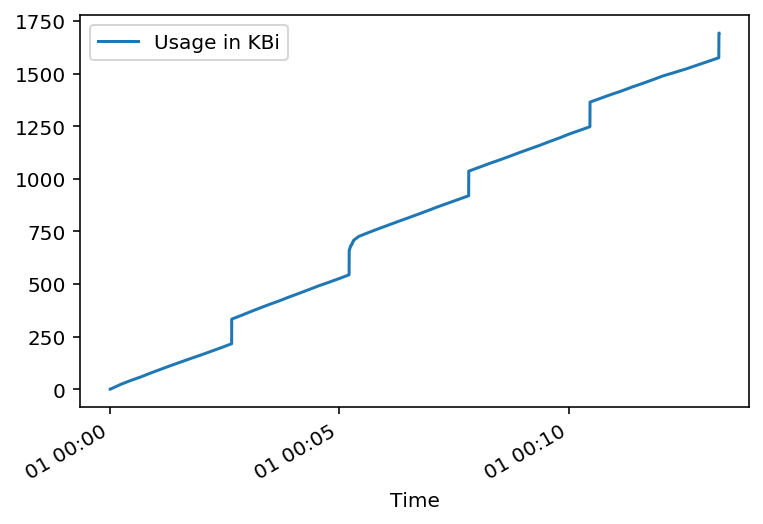

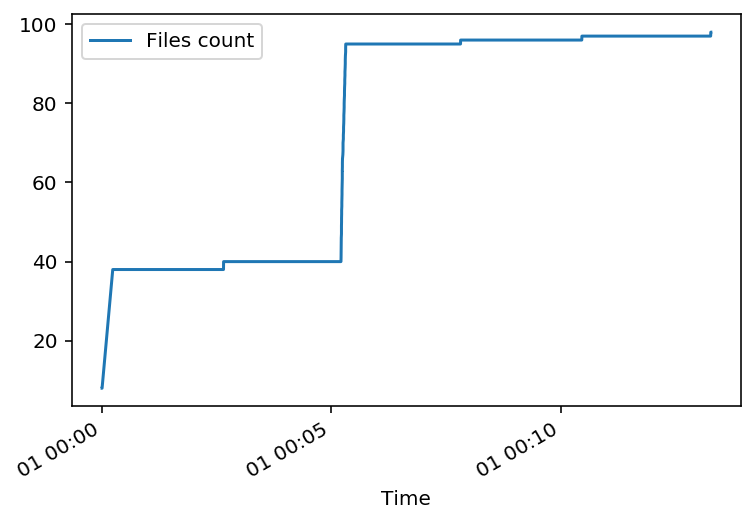

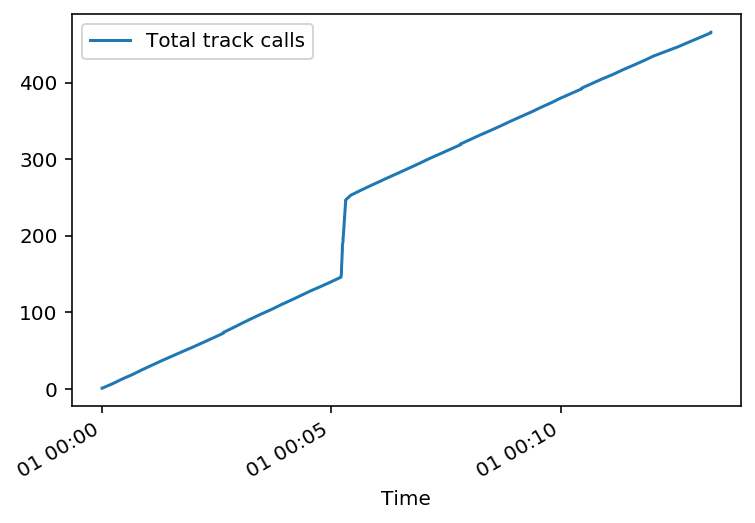

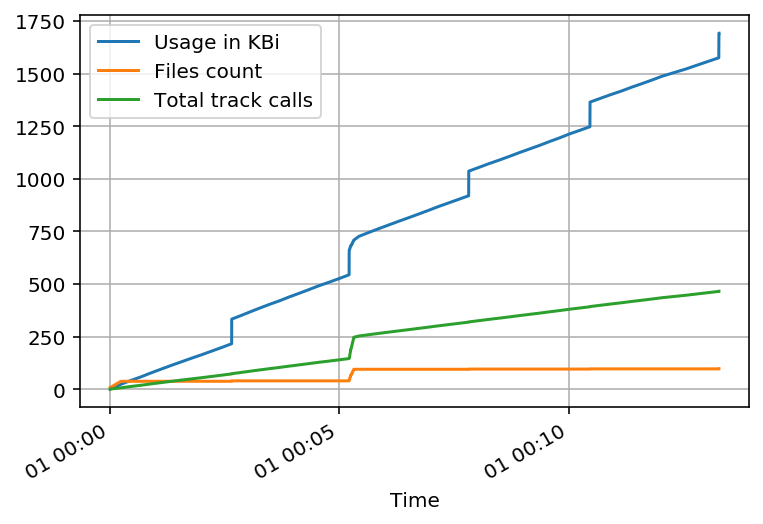

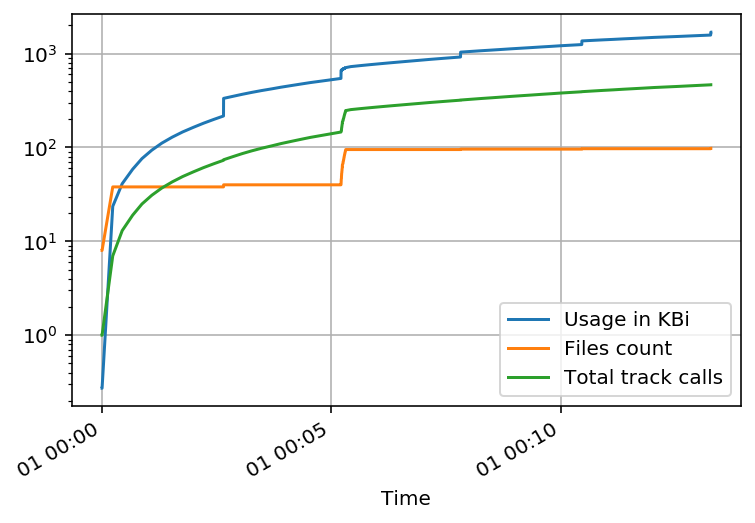

In [3]:
df.plot(x='Time', y=['Usage in KBi'])
df.plot(x='Time', y=['Files count'])
df.plot(x='Time', y=['Total track calls'])
df.plot(x='Time', y=['Usage in KBi', 'Files count', 'Total track calls'], logy=False, grid=True)
df.plot(x='Time', y=['Usage in KBi', 'Files count', 'Total track calls'], logy=True, grid=True)

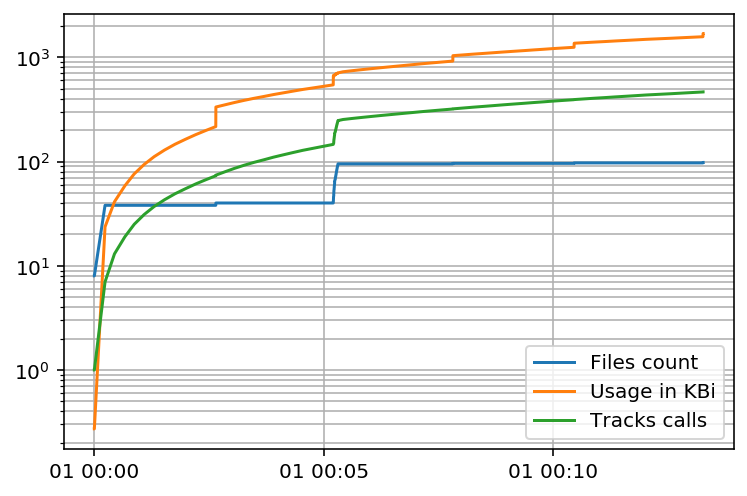

In [4]:
f = plt.figure()
plt.semilogy(df.Time, df['Files count'], df.Time, df['Usage in KBi'], df.Time, df['Total track calls'])
plt.grid(which='both')
plt.legend(['Files count', 'Usage in KBi', 'Tracks calls'])

In [8]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Time'], y=df['Files count'],
                    mode='lines',
                    name='Files count'))
fig.add_trace(go.Scatter(x=df['Time'], y=df['Usage in KBi'],
                    mode='lines',
                    name='Usage in KBi'))
fig.add_trace(go.Scatter(x=df['Time'], y=df['Total track calls'],
                    mode='lines',
                    name='Total track calls'))  


for c in track_columns:
    fig.add_trace(go.Scatter(x=df['Time'], y=df[c],
                    mode='markers',
                    name=c))  
    
fig.update_layout(yaxis_type="log")
fig.write_image("log.png")


fig.show()